# Calculating time spent in radio quiet cone

### For a given coordinates in Earth_X and Sun_X coordinate system it can be determined if the s/c is in radioquiet cone or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as wids

In [121]:
df=pd.read_csv("12Jan-11Feb_2024.csv", header=0)

filename= "12Jan-11Feb_2024"

# data file generated directly from GMAT has only one value in header which is space sepearted names of parameters
# the header of the.csv file should be changed first from any text editor beforehand by changing space to comma



In [122]:
df

,lunar_probe.ElapsedSecs,lunar_probe.ElapsedDays,lunar_probe.Luna.Altitude,lunar_probe.Luna.Longitude,lunar_probe.Earth_X.RA,lunar_probe.Sun_X.RA,lunar_probe.Luna.Latitude,lunar_probe.Earth_X.DEC,lunar_probe.Sun_X.DEC,lunar_probe.LunaFixed.VMAG,lunar_probe.Earth_X.VMAG,lunar_probe.Sun_X.VMAG
0,0.000000e+00,0.000000,125.130950,-5.335419e-13,2.957796,-170.242843,-3.853951e-14,-6.431014,-1.514917,1.605385,1.604838,1.609973
1,4.052882e+01,0.000469,125.113698,2.000000e+00,4.967806,-168.236715,5.248313e-02,-6.332043,-1.453289,1.605401,1.604854,1.609988
2,8.105611e+01,0.000938,125.061980,4.000000e+00,6.977010,-166.230703,1.049094e-01,-6.225285,-1.389873,1.605444,1.604897,1.610031
3,1.215803e+02,0.001407,124.975938,6.000000e+00,8.985357,-164.224806,1.572117e-01,-6.110878,-1.324751,1.605515,1.604968,1.610102
4,1.621000e+02,0.001876,124.855780,8.000000e+00,10.992805,-162.219027,2.093227e-01,-5.988971,-1.258005,1.605615,1.605068,1.610201
...,...,...,...,...,...,...,...,...,...,...,...,...
65892,2.591825e+06,29.997980,114.773286,2.400000e+01,23.725450,-141.490195,2.570467e+00,0.582631,1.979118,1.614473,1.613737,1.619033
65893,2.591865e+06,29.998443,114.370056,2.600000e+01,25.714783,-139.484932,2.530208e+00,0.764811,1.985925,1.614817,1.614081,1.619376
65894,2.591906e+06,29.998906,113.946527,2.800000e+01,27.704414,-137.479528,2.486846e+00,0.946072,1.990298,1.615176,1.614439,1.619733
65895,2.591945e+06,29.999369,113.503398,3.000000e+01,29.694389,-135.473983,2.440432e+00,1.126192,1.992229,1.615550,1.614814,1.620106


In [123]:

for index,name in enumerate(df.columns):
    print(index,name)
    
    
df_t=df.iloc[:,[1,2,3,4,5,6,7,8]]  #   get useful parameters only
df_t.tail()

0 lunar_probe.ElapsedSecs
1 lunar_probe.ElapsedDays
2 lunar_probe.Luna.Altitude
3 lunar_probe.Luna.Longitude
4 lunar_probe.Earth_X.RA
5 lunar_probe.Sun_X.RA
6 lunar_probe.Luna.Latitude
7 lunar_probe.Earth_X.DEC
8 lunar_probe.Sun_X.DEC
9 lunar_probe.LunaFixed.VMAG
10 lunar_probe.Earth_X.VMAG
11 lunar_probe.Sun_X.VMAG    


,lunar_probe.ElapsedDays,lunar_probe.Luna.Altitude,lunar_probe.Luna.Longitude,lunar_probe.Earth_X.RA,lunar_probe.Sun_X.RA,lunar_probe.Luna.Latitude,lunar_probe.Earth_X.DEC,lunar_probe.Sun_X.DEC
65892,29.997980,114.773286,23.999996,23.725450,-141.490195,2.570467,0.582631,1.979118
65893,29.998443,114.370056,25.999996,25.714783,-139.484932,2.530208,0.764811,1.985925
65894,29.998906,113.946527,27.999996,27.704414,-137.479528,2.486846,0.946072,1.990298
65895,29.999369,113.503398,29.999996,29.694389,-135.473983,2.440432,1.126192,1.992229
65896,29.999832,113.041386,31.999996,31.684753,-133.468295,2.391021,1.304950,1.991712


# EARTH CONE



# Coeffiecents of the equation describing bpundary of Earth quiet cone are calculated beforehand

### Check whether the satellite is Earth quiet region only when its RA value (in Earth_X system) is in range $(93^\circ ,115^\circ)$ East or West as the boundary of the quiet cone lies in this region


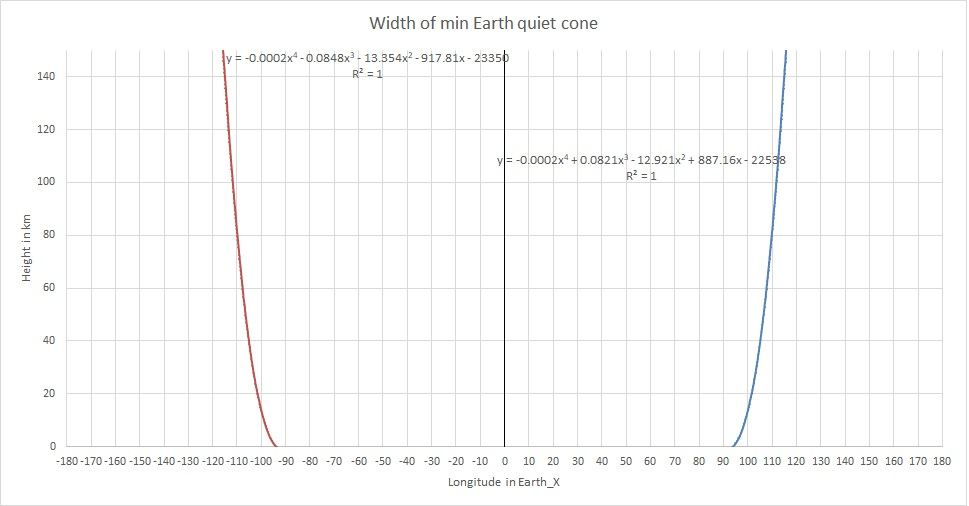






## Checking if s/c is in Earth shadow or not and making a column of boolean values

In [124]:
P_coef= np.array([-0.000190753,0.082124484,-12.92130989,887.1567053,-22538.17666]) # for long >0
N_coef=np.array([-0.000197082,-0.084828261,-13.35374984,-917.8126915,-23350.44014]) # for long <0

earth_cone= pd.read_csv("earth_cone.csv", header=0)
earth_cone.head()



,height,Plong,Nlong
0,0.000000,93.492475,-93.543440
1,0.501672,94.231855,-94.280157
2,1.003344,94.692573,-94.739328
3,1.505017,95.079708,-95.125791
4,2.006689,95.434054,-95.480163


In [125]:

# deleteing if column already present    
if "in Econe" in df_t.columns:
    del df_t["in Econe"]
    

#---- A function to return height of the boundary at a given longitude in either 
#---- hemisphere using coefficients from above
    

def boundary_height( longitude):
    
    alt_exp=0 # altitude of the cone, if height of s/c below this then it is in earth quiet cone
    
    if longitude> 0: # if longitudes are positive
        for power in range(5):
            alt_exp+= (P_coef[4-power]*(longitude**power))
    
    else: # negative side of longitudes
        
        for power in range(5):
            alt_exp+= (N_coef[4-power]*(longitude**power))
        
    return alt_exp

#------------------- making a column of True/False whether s/c is in shadow region of earth or not


def check_in_Econe(row): # check if s/c is in cone or not, given longitude in Earth_X and altitude
    longitude, height= row["lunar_probe.Earth_X.RA"], row["lunar_probe.Luna.Altitude"]
    
    
    
    if (abs(longitude)> 93 and abs(longitude)<= 115): # boundary of cone
            
        alt_exp= boundary_height(longitude ) 
       

        if height <= alt_exp :
            return True
        else:
            return False
    elif ( abs(longitude) > 115):
        return True # s/c is definetely inside earth quiet cone 
    else:
        return False # s/c is definetly outside earth quiet cone cone
    
df_t['in Econe'] = df_t.apply (lambda row: check_in_Econe(row), axis=1)# make a new column if s/c in Earth cone or not

display(df_t.sample(5))

#----------------------------------------------------------------------------
# Calculating time spent in shadow region of Earth

day_cone= 0 # total time

day_begin=0 # time at which s/c enters earth cone
day_end=0 # time at which s/c leaves earth cone

for index,row in df_t.iterrows():
        
    if index>0 :
        if row["in Econe"]==False:
            if df_t.iloc[index-1]["in Econe"]==True: # s/c has just come out of cone
                day_end= df_t.iloc[index-1]["lunar_probe.ElapsedDays"]# day_end is last day value in quiet cone
                
                day_cone+= (day_end- day_begin)
                day_end=day_begin=0
            
            else: # s/c was already outside cone
                pass

        else:# E_cone value is true.... s/c is in cone
            
            if df_t.iloc[index-1]["in Econe"]==True:# s/c was already in cone 
                day_end= row["lunar_probe.ElapsedDays"]
                
            else: # last value was FALSE and s/c has just entered cone
                day_begin= day_end= row["lunar_probe.ElapsedDays"]

                
# print(day_begin, day_end,(day_end- day_begin)) 
if (day_begin != day_end):
    day_cone+=  (day_end- day_begin)# in case simulation ended while s/c was in cone  


print("Days spent in earth quiet cone cumulative ",day_cone)
print("Hours spent in earth quiet cone cumulative ",day_cone*24)
        
        

<ipython-input-125-c0b8287a65ad>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['in Econe'] = df_t.apply (lambda row: check_in_Econe(row), axis=1)# make a new column if s/c in Earth cone or not


,lunar_probe.ElapsedDays,lunar_probe.Luna.Altitude,lunar_probe.Luna.Longitude,lunar_probe.Earth_X.RA,lunar_probe.Sun_X.RA,lunar_probe.Luna.Latitude,lunar_probe.Earth_X.DEC,lunar_probe.Sun_X.DEC,in Econe
15092,6.870549,100.951131,-56.000004,-61.709095,-142.615241,1.861790,-2.713426,0.688372,False
2215,1.008771,89.521374,110.000000,110.957835,-47.986695,1.301584,5.847509,2.295215,True
40055,18.235172,48.877090,-170.000006,-167.646824,-118.708510,2.023718,1.206897,1.929040,True
55291,25.172074,105.974824,61.999994,69.284281,-162.304861,1.793814,-2.774360,0.721165,False
51500,23.446067,124.628087,39.999994,47.556878,154.699575,0.697614,-5.946404,-0.901159,False


Days spent in earth quiet cone cumulative  11.089352657254286
Hours spent in earth quiet cone cumulative  266.14446377410286


# SUN CONE

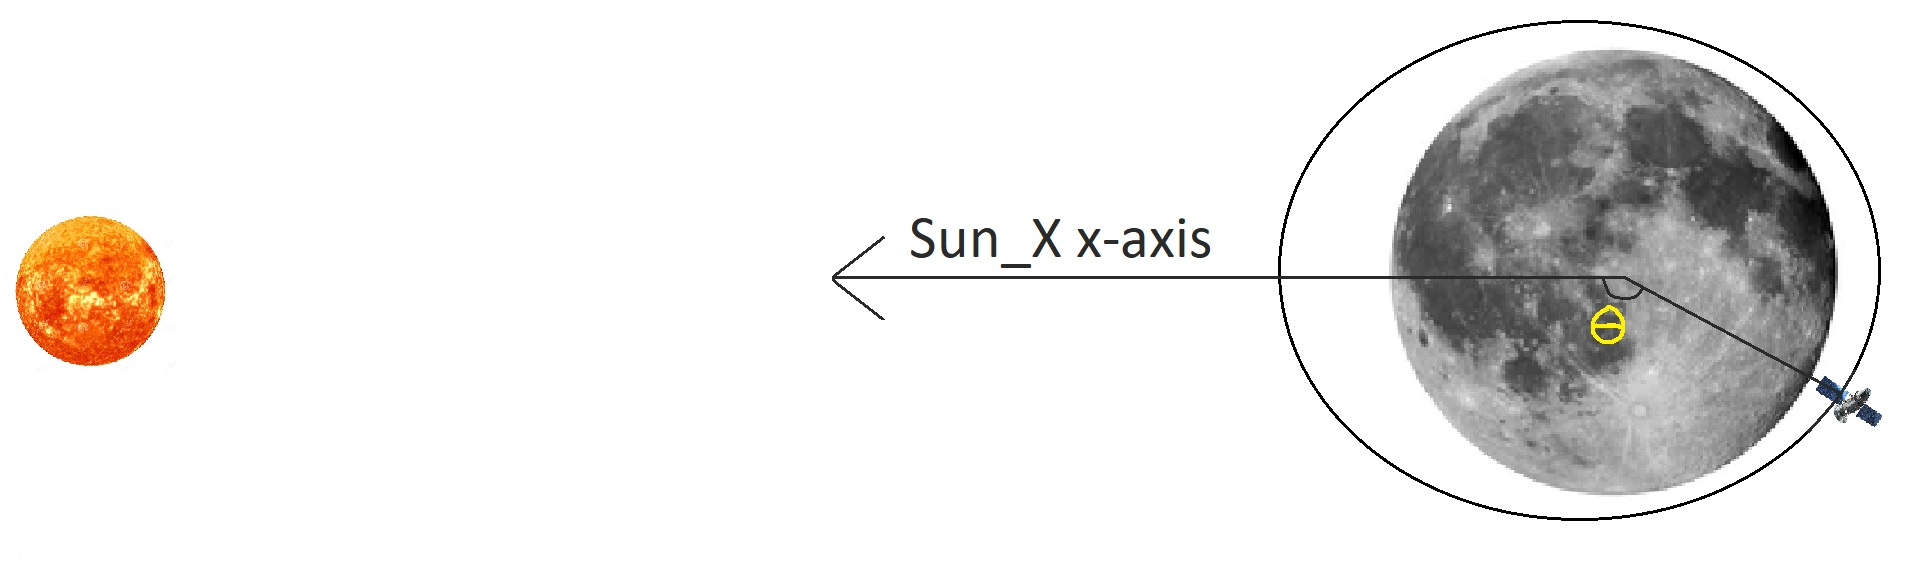


## When RA value (in Sun_X system) of the spacecraft > $110^\circ$ it is in Sun Quiet Cone

In [126]:
# deleting column if already present

if "in Scone" in df_t.columns:
    del df_t["in Scone"]
    
if "in Pcone" in df_t.columns:
    del df_t["in Pcone"]
    
    
#--------- making a column "in Scone" with boolean values telling if s/c is in SUN quiet cone or not----


def check_in_Scone(row):
    slong= row["lunar_probe.Sun_X.RA"]
    
    if abs(slong)>110.0:
        return True
    else:
        return False
    
df_t["in Scone"] = df_t.apply (lambda row: check_in_Scone(row), axis=1)# make a new column if s/c in Sun cone or not



#------making a column "in Pcone" with boolean values telling if s/c is in both SUN and EARTH quiet cone or not----



def check_in_Pcone(row):# check if s/c is on both cones or not
    
    if  row["in Econe"]==True and row["in Scone"]==True:
        return True
    else:
        return False
    
df_t["in Pcone"] = df_t.apply (lambda row: check_in_Pcone(row), axis=1)# make a new column if s/c in both cones or not



        

<ipython-input-126-8e5dd1faa58a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["in Scone"] = df_t.apply (lambda row: check_in_Scone(row), axis=1)# make a new column if s/c in Sun cone or not
<ipython-input-126-8e5dd1faa58a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["in Pcone"] = df_t.apply (lambda row: check_in_Pcone(row), axis=1)# make a new column if s/c in both cones or not


In columns "in Econe", "in Scone", "in Pcone" there may be some *TRUE* values which are preceeded and followed by *FALSE* values. These are **lone TRUE values** and should not be considered when calculating time spent by satellite in in prime cone. These values occur between first quater and full moon and between full moon and last quater when the width of the prime cone is at a minimum

These values cannot be used to calculate time spent in radio quiet cone. These **lone TRUE values** occur in "in Pcone" column since it is formed by a logical relation between "in Econe" and "in Scone" columns . **lone TRUE values** do not occur in "in Econe" or "in Scone"

In [29]:
lone_e=True  
lone_s=True
lone_p=True

for index,row in df_t.iterrows():
    if index==0 or index==len(df_t)-1: # if first or  last entry then skip
        continue

    else:
        if row["in Econe"]==True and lone_e:
            if df_t.iloc[index-1]["in Econe"]==False and df_t.iloc[index+1]["in Econe"]==False:
                lone_e= False # if values just before and after a TRUE value are FALSE then it is a lone true value
            
            
        if row["in Scone"]==True and lone_s:
            if df_t.iloc[index-1]["in Scone"]==False and df_t.iloc[index+1]["in Scone"]==False:
                lone_s= False # if values just before and after a TRUE are FALSE then lone true value
                
        if row["in Pcone"]==True and lone_p:
            if df_t.iloc[index-1]["in Pcone"]==False and df_t.iloc[index+1]["in Pcone"]==False: # counting lone true values
                lone_p= False
                
               
               
print("Is there any lone true values in  \"in Econe\" column: ",not lone_e)

print("Is there any lone true values in  \"in Scone\" column: ",not lone_s)

print("Is there any lone true values in  \"in Pcone\" column: ",not lone_p)


Is there any lone true values in  "in Econe" column:  False
Is there any lone true values in  "in Scone" column:  False
Is there any lone true values in  "in Pcone" column:  True


In [89]:
df_t.iloc[:,[0,1,2,4,6,8,9,10]].tail(5)

,lunar_probe.ElapsedDays,lunar_probe.Luna.Altitude,lunar_probe.Luna.Longitude,lunar_probe.Sun_X.RA,lunar_probe.Earth_X.DEC,in Econe,in Scone,in Pcone
65892,29.998098,114.795834,24.000001,-158.090534,-1.234115,False,True,False
65893,29.998561,114.369955,26.000001,-156.087051,-1.469050,False,True,False
65894,29.999025,113.923786,28.000001,-154.083601,-1.702228,False,True,False
65895,29.999487,113.458052,30.000001,-152.080176,-1.933369,False,True,False
65896,29.999950,112.973502,32.000001,-150.076762,-2.162195,False,True,False


# Time Spent in Quiet Cone cumulatively

In [127]:
# ------------ calculate time spent in Prime cone cumulatively for 2 years

cone_times=np.zeros(0) # array of all the times it is in cone in each orbit

cone_long= np.zeros(0) # array of count of longitudes the s/c spends inside cone >1 


long_begin=0 # longitude when s/c enters prime cone
long_end=0  # longitude when spacecraft exits prime cone

days= np.zeros(0) # array of elapsed days when s/c comes outside prime cone 

day_cone= 0 # total time
day_begin=0 # time at which s/c enters cone
day_end=0 # time at which s/c leaves cone



for index,row in df_t.iterrows():
        
    if index==0:# if first entry then skip
        continue
        
    elif index==len(df_t)-1:# For last entry in file check if s/c is in cone or not
        if row["in Pcone"]==True:
            if df_t.iloc[index-1]["in Pcone"]==True:# s/c was already in cone
                day_end=row["lunar_probe.ElapsedDays"]
                long_end= row["lunar_probe.Luna.Longitude"]
                long_end = long_end if long_end>0 else (360+long_end)# 0-360 deg system
                
                day_cone+= (day_end-day_begin)
                cone_times= np.append(cone_times, (day_end- day_begin))
                cone_long= np.append(cone_long, (long_end- long_begin))
                days= np.append(days, day_end)
            
                long_begin= long_end= 0 
                day_end= day_begin=0
                
            else: # last value was FALSE
                continue
                
        continue
        
    else:
        if row["in Pcone"]==True:# current value
            
           
            if df_t.iloc[index-1]["in Pcone"]==False and df_t.iloc[index+1]["in Pcone"]==False: #lone true value
                day_end= day_begin=0
                long_begin = long_end=0
                continue
                
            if df_t.iloc[index-1]["in Pcone"]==True and df_t.iloc[index+1]["in Pcone"]==False: # last true value in a sequence
                
                day_end= row["lunar_probe.ElapsedDays"]
                long_end= row["lunar_probe.Luna.Longitude"]
                long_end = long_end if long_end>0 else (360+long_end)# from (-180 to 180) system to (0 to 360) system


                day_cone+= (day_end-day_begin)
                cone_times= np.append(cone_times, (day_end- day_begin))
                cone_long= np.append(cone_long, (long_end- long_begin))
                days= np.append(days, day_end)
            
                long_begin= long_end= 0 
                day_end= day_begin=0
                continue
                
            if df_t.iloc[index-1]["in Pcone"]==True and df_t.iloc[index+1]["in Pcone"]==True:# middle true value
                # nothing needs to be updated
                continue
            
            if df_t.iloc[index-1]["in Pcone"]==False and df_t.iloc[index+1]["in Pcone"]==True:# first true value
                day_begin= day_end= row["lunar_probe.ElapsedDays"]
                long_begin= long_end= row["lunar_probe.Luna.Longitude"]
                long_begin = long_begin if long_begin>0 else (360+long_begin)
                long_end = long_end if long_end>0 else (360+long_end)
                
                continue
                
        else: #row["in Pcone"] is Fasle:
            continue
    
    
    
                



print("Days spent in Prime cone cumulative ",day_cone," days")  
print("Hours spent in Prime cone cumulative ",day_cone*24," hrs")  
print("Max and Min time spent in Prime cone", cone_times.max()*24*60," mins  ", cone_times.min()*24*60, " mins")

Days spent in Prime cone cumulative  4.447234482304355  days
Hours spent in Prime cone cumulative  106.73362757530451  hrs
Max and Min time spent in Prime cone 43.67847486924006  mins   0.6437391898464284  mins


## "cone_times" is an array of all the times the spacecraft spends in quiet cone at each passing

## "cone_long" is an array of the number of longitudes a s/c traverses inside Prime cone at each passing. This value is always >=min step size of simulations.

## "days" is an array of Days Elapsed when s/c comes out of prime cone during each orbit

In [130]:
%matplotlib qt


P_times= {"orbit":np.arange(len(cone_times))+1,"Days":days,"P time":cone_times*24*60, "long crossed": cone_long}

#dataframe with: index number ; days elapsed when coming out of prime cone ; time in mins ; longitudes crossed inside prime cone


time_df=pd.DataFrame(P_times)

# time_df= time_df[time_df["P time"]>= 30] # consider times only abose a ceratin threshhold time value 



############################  2D figure 
fig1 = plt.figure(1, dpi=90)
plt.style.use('seaborn')

######################### Set according to file opened

plt.title(filename, fontsize= 30)

#########################

plt.scatter(time_df["Days"], time_df["P time"], marker="o",
            s= 100, c= time_df["long crossed"],
            edgecolors="black", linewidth= 1,
            cmap="gnuplot" )


plt.xlabel("Number of days elapsed", fontsize=30)
plt.xticks(fontsize= 25)
plt.ylabel("Time in Minutes", fontsize=30)
plt.yticks(fontsize= 25)
plt.grid(True, color= "black", lw=1)

ticks = np.arange(time_df["long crossed"].min(), time_df["long crossed"].max()+1, 4)
clbar= plt.colorbar( ticks= ticks,
                   orientation= "horizontal")
ax = clbar.ax


clbar.ax.tick_params(labelsize=18,direction='out', length=6, width=2, 
                   grid_color='r', grid_alpha=0.5)
clbar.set_label("Width of prime cone in longitudes", fontsize=30)




plt.show()


display(time_df)

,orbit,Days,P time,long crossed
0,1,2.679004,0.648125,2.0
1,2,2.760954,0.648079,2.0
2,3,2.842904,1.295561,4.0
3,4,2.924854,1.295462,4.0
4,5,3.006804,1.942311,6.0
...,...,...,...,...
279,280,25.510704,1.928760,6.0
280,281,25.592203,1.286604,4.0
281,282,25.674147,1.286706,4.0
282,283,25.755645,0.643739,2.0


In [111]:
np.arange(time_df["long crossed"].min(), time_df["long crossed"].max()+5, 4)

array([  1.99999998,   5.99999998,   9.99999998,  13.99999998,
        17.99999998,  21.99999998,  25.99999998,  29.99999998,
        33.99999998,  37.99999998,  41.99999998,  45.99999998,
        49.99999998,  53.99999998,  57.99999998,  61.99999998,
        65.99999998,  69.99999998,  73.99999998,  77.99999998,
        81.99999998,  85.99999998,  89.99999998,  93.99999998,
        97.99999998, 101.99999998, 105.99999998, 109.99999998,
       113.99999998, 117.99999998, 121.99999998, 125.99999998,
       129.99999998, 133.99999998, 137.99999998, 141.99999998])

In [101]:
time_df.describe()

,orbit,Days,P time,long crossed
count,272.000000,272.000000,272.000000,272.000000
mean,136.500000,15.086067,21.326346,67.492647
std,78.663842,6.437900,12.477984,39.708439
min,1.000000,3.990656,0.640170,2.000000
25%,68.750000,9.541153,10.646561,33.500000
50%,136.500000,15.092671,20.967953,66.000000
75%,204.250000,20.631113,32.101259,102.000000
max,272.000000,26.168146,43.545943,138.000000


In [120]:
time_df.sum()

orbit           11400.000000
Days             1246.566801
P time           2936.688955
long crossed     9319.999999
dtype: float64

# Plotting altitude in LunaFixed coordinate system

code written is basically to get rid of the horizontal line that are plotted when longitude changes from +ve to -ve . The idea is to plot only those altitudes at a time in which longitude is strictly increasing from -180 to +180 in LunaFixed system. Such a sequence of altitude and longitude is plotted one at a time.


In [138]:
%matplotlib qt


x_vals= np.array(df_t["lunar_probe.Luna.Longitude"]) # OR you can take every second value to reduce complexity
y_vals= np.array(df_t["lunar_probe.Luna.Altitude"])

plot_x=np.zeros(0)  # to store plottable values during each orbit... bascially x_vals should be in strictly insreasing order
plot_y=np.zeros(0)

plt.figure(3, dpi=100)

for i, long_val in enumerate(x_vals):
    if (long_val<-179.5 or long_val>179.5 ):  # to skip horizontal lines when going 170 to -180 or 180 to -170 
            #now the long_val is guarenteed to be -180 or +180 
            
            if (long_val<0): # long value is -ve -180
                    
                plot_x= np.append(plot_x, -x_vals[i])# add longitude to the positive side at +180 deg
                plot_y= np.append(plot_y, y_vals[i]) # add altitude value
                    
                plt.plot(plot_x, plot_y, linewidth=.1  ,color="red")     # plot plottable values
                
                plot_x=np.zeros(0)   # dump the array values
                plot_y=np.zeros(0)
                    
                plot_x= np.append(plot_x, x_vals[i])# to the new array add -180 deg longitude value
                plot_y= np.append(plot_y, y_vals[i]) 
                    
            else: # longitude value is +vs +180
                plot_x= np.append(plot_x, x_vals[i])# add a +180 deg longitude value
                plot_y= np.append(plot_y, y_vals[i])
                
                plt.plot(plot_x, plot_y, linewidth=.1, color="red")     # plot plottable values
                
                plot_x=np.zeros(0)   # dump the array values
                plot_y=np.zeros(0)
                    
                plot_x= np.append(plot_x, -x_vals[i])# to the new array add -180 deg longitude value
                plot_y= np.append(plot_y,  y_vals[i])
         
        
        
        
    else:
        plot_x= np.append(plot_x, x_vals[i])  # plottable x_values should be in increasing order
        plot_y= np.append(plot_y, y_vals[i])
 

#
if (len(plot_x)>0): # in case for loop exited without printing last sequence of prinatble value
    plt.plot(plot_x, plot_y, linewidth=.1 ,color="red")     # plot plottable values
    
    
print("Plot stops at ",plot_x[-1], "deg") # plot stops at this point

plot_x=np.zeros(0)   # dump the array values
plot_y=np.zeros(0)
    
    
#####################################################################


plt.xlim(-180, 180)
# plt.ylim(60, 130)
plt.xticks(ticks= np.arange(-180, 180, 20), fontsize=25)
plt.yticks( fontsize=20)
title= "Altitude of s/c for "+ filename
plt.title(title , fontsize=25) #  SET according to file opened
plt.xlabel("Longitude LunaFixed", fontsize=25)
plt.ylabel("Altitude", fontsize=25)
plt.grid(True, color= "black", lw= 0.5)


########################################################################
# Queit Cone not added since it is in Earth_X coordinates system and this plot is in Luna Fixed system

Plot stops at  31.99999615979349 deg


# Plotting altitude in Earth_X coordinate system centered around $180^\circ$ longitude in Earth_X System along with Radio Quiet cone of Earth

In [97]:



def plot_one_orbit( day=1, orbit=1):
    
    low_lim= (orbit-1)*180
    up_lim= orbit* 180
    
    df_t_1= df_t[(df_t["lunar_probe.ElapsedDays"] < day) & (df_t["lunar_probe.ElapsedDays"] >= day-1)][low_lim: up_lim]
    
    

    plt.figure(1 , figsize= (15, 12))
    title= "Day "+ str(day)+ " , orbit "+str(orbit)
    plt.title(title, fontsize=25)
    for i, row in df_t_1.iterrows():
        
        
        clr= "red" # if outside Pcone then red colour
        mark= "+" # if outside Scone then triangell marker
        size=10
        
        if (row["in Pcone"]):
            clr="blue"  # if inside Pcone then green colour
            size= 45
        if (row["in Scone"]):
            mark= "o" # if inside Scone then star marker
            size= 45
        
        x_val= row["lunar_probe.Earth_X.RA"]
        x_val= x_val if x_val>0 else 360+ x_val
        y_val= row["lunar_probe.Luna.Altitude"]
        
        plt.scatter(x_val, y_val,
                   color= clr, marker= mark, s= size)
        
        
        
        
    e_cone_px= np.array(earth_cone["Plong"])
    e_cone_nx=  np.array(earth_cone["Nlong"])
    e_cone_nx= 360+ e_cone_nx
    e_cone_h= np.array(earth_cone["height"])
    
    plt.xlabel("Longitude Earth_X", fontsize=25)
    plt.ylabel("Altitude in km", fontsize=25)
    plt.xticks( fontsize=20)
    plt.yticks( fontsize=20)
    plt.xlim(0, 360)
    plt.ylim(0, 150)
    plt.grid(True, color= "black", lw= 0.5)
    plt.plot(e_cone_px, e_cone_h, color= "green")
    plt.plot(e_cone_nx, e_cone_h, color= "green")
    plt.show
    

def plot_one_day( day=1):
    
    
    
    df_t_1= df_t[(df_t["lunar_probe.ElapsedDays"] < day) & (df_t["lunar_probe.ElapsedDays"] >= day-1)]
    
    plt.figure(1 , figsize= (15, 12))
    title= "Day "+ str(day-1)+ " to Day "+str(day)
    plt.title(title, fontsize=25)
    for i, row in df_t_1.iterrows():
        
        
        clr= "red" # if outside Pcone then red colour
        mark= "+" # if outside Scone then triangell marker
        size=1
        
        if (row["in Pcone"]):
            clr="blue"  # if inside Pcone then green colour
            size= 35
        if (row["in Scone"]):
            mark= "o" # if inside Scone then star marker
            size= 35
        
        x_val= row["lunar_probe.Earth_X.RA"]
        x_val= x_val if x_val>0 else 360+ x_val
        y_val= row["lunar_probe.Luna.Altitude"]
        
        plt.scatter(x_val, y_val,
                   color= clr, marker= mark, s= size)
        
        
        
        
    e_cone_px= np.array(earth_cone["Plong"])
    e_cone_nx=  np.array(earth_cone["Nlong"])
    e_cone_nx= 360+ e_cone_nx
    e_cone_h= np.array(earth_cone["height"])
    
    plt.xlabel("Longitude Earth_X", fontsize=25)
    plt.ylabel("Altitude in km", fontsize=25)
    plt.xticks( fontsize=20)
    plt.yticks( fontsize=20)
    plt.xlim(0, 360)
    plt.ylim(0, 150)
    plt.grid(True, color= "black", lw= 0.5)
    plt.plot(e_cone_px, e_cone_h, color= "green")
    plt.plot(e_cone_nx, e_cone_h, color= "green")
    plt.show
    





In [59]:
%matplotlib inline
wids.interact(plot_one_orbit,
              day=wids.IntSlider(min=1, max= 30, continuous_update=False)
              ,orbit= wids.IntSlider(min= 1,max= 12 , continuous_update=False))


interactive(children=(IntSlider(value=1, continuous_update=False, description='day', max=30, min=1), IntSlider…

<function __main__.plot_one_orbit(day=1, orbit=1)>

In [98]:
%matplotlib inline
wids.interact(plot_one_day,
              day=wids.IntSlider(min=1, max= 30, continuous_update=False))

# day 1 plots data points when number of elapsed days >0 and <1
# day 2 plots data points when number of elapsed days >1 and <2 and so on

interactive(children=(IntSlider(value=1, continuous_update=False, description='day', max=30, min=1), Output())…

<function __main__.plot_one_day(day=1)>

# Longitudes (RA) and Latitudes (DEC) in Earth_X , Sun_X and LunaFixed coordinate systems

## Every time s/c longitude in LunaFixed is 0 its coordinates in other 2 systems are noted, depending on the time of the year they may be very same (near Full Moon) or vaslty different (nea New Moon)

## For Latitude/ DEC all values are plotted

In [14]:
zero_long =df[abs(df_t["lunar_probe.Luna.Longitude"])< 1]# those positions of s/c when it is near LunaFixed x-axis
# zero_long.sample(10)
print(len(zero_long))

plt.figure(5)
plt.scatter(zero_long["lunar_probe.Luna.Longitude"], zero_long["lunar_probe.ElapsedDays"], label="Luna.Longitude", color="grey")
plt.scatter(zero_long["lunar_probe.Earth_X.RA"], zero_long["lunar_probe.ElapsedDays"], label="Earth_X.RA", color= "blue")
plt.scatter(zero_long["lunar_probe.Sun_X.RA"], zero_long["lunar_probe.ElapsedDays"], label="Sun_X.RA" , color= "orange")


plt.title("Longitude Coordinate system", fontsize=17) #  SET according to file opened
plt.xlabel("Longitude ", fontsize=17)
plt.ylabel("Days Elapsed", fontsize=17)
plt.grid()
plt.show()
plt.legend()





plt.figure(6)
skip=2
print(len(df[:][::skip]))
plt.plot(df["lunar_probe.Luna.Latitude"][::skip], df["lunar_probe.ElapsedDays"][::skip], label="Luna.Latitude", color="grey")
plt.plot(df["lunar_probe.Earth_X.DEC"][::skip], df["lunar_probe.ElapsedDays"][::skip], label="Earth_X.DEC", color="blue")
plt.plot(df["lunar_probe.Sun_X.DEC"][::skip], df["lunar_probe.ElapsedDays"][::skip], label="Sun_X.DEC", color="orange")


plt.title("Latitude Coordinate system", fontsize=17) #  SET according to file opened
plt.xlabel("Latitude ", fontsize=17)
plt.ylabel("Days Elapsed", fontsize=17)
plt.grid()
plt.show()
plt.legend()

13
1098
